In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_rows = 4000

df = pd.read_csv('EU_Agri_expenditure.csv')
df = df[df['Area'].isin(['Ireland','Netherlands','France','Italy','Spain','Poland','Germany','Sweden','Finland','Norway'])]
df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
135,IG,Government Expenditure,246,Finland,6110,Value US$,23161,"Agriculture, forestry, fishing (Central Govern...",2001,2001,millions,1398.645202,A,Official figure,Consolidated Central Government Expenditure Ex...
136,IG,Government Expenditure,246,Finland,6110,Value US$,23161,"Agriculture, forestry, fishing (Central Govern...",2002,2002,millions,1520.867220,A,Official figure,Consolidated Central Government Expenditure Ex...
137,IG,Government Expenditure,246,Finland,6110,Value US$,23161,"Agriculture, forestry, fishing (Central Govern...",2003,2003,millions,1865.616543,A,Official figure,Consolidated Central Government Expenditure Ex...
138,IG,Government Expenditure,246,Finland,6110,Value US$,23161,"Agriculture, forestry, fishing (Central Govern...",2004,2004,millions,2043.793808,A,Official figure,Consolidated Central Government Expenditure Ex...
139,IG,Government Expenditure,246,Finland,6110,Value US$,23161,"Agriculture, forestry, fishing (Central Govern...",2005,2005,millions,2199.920410,A,Official figure,Consolidated Central Government Expenditure Ex...


In [2]:
countries = df['Area'].unique()


In [3]:
df = df[df["Year"].isin([2020]) == False]

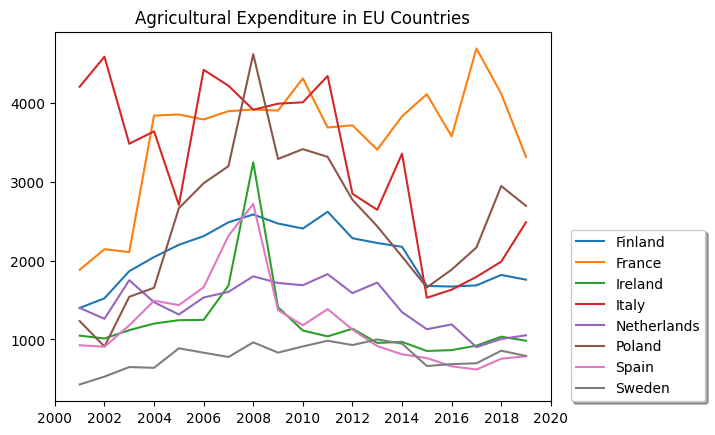

In [4]:

for i in countries:
    plt.plot(df[df['Area'] == i]['Year'], df[df['Area'] == i]['Value'])
plt.title('Agricultural Expenditure in EU Countries')
plt.legend(countries, shadow=True, loc=(1.04,0))
plt.xticks(np.arange(2000, 2022, 2))
plt.show()



In [5]:
gdpDF = pd.read_csv('EU_GDP.csv')
#gdpDF = gdpDF[gdpDF['Area'].isin(['Ireland','Germany','France','Italy','Spain'])]
gdpDF = gdpDF[gdpDF["Year"].isin([2020]) == False]
gdpDF.head()


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,MK,Macro Indicators,40,Austria,6110,Value US$,22008,Gross Domestic Product,2001,2001,millions,197336.1133,X,Figure from international organizations,NaN
1,MK,Macro Indicators,40,Austria,6110,Value US$,22008,Gross Domestic Product,2002,2002,millions,213387.4776,X,Figure from international organizations,NaN
2,MK,Macro Indicators,40,Austria,6110,Value US$,22008,Gross Domestic Product,2003,2003,millions,261685.6874,X,Figure from international organizations,NaN
3,MK,Macro Indicators,40,Austria,6110,Value US$,22008,Gross Domestic Product,2004,2004,millions,300917.2984,X,Figure from international organizations,NaN
4,MK,Macro Indicators,40,Austria,6110,Value US$,22008,Gross Domestic Product,2005,2005,millions,315966.5597,X,Figure from international organizations,NaN


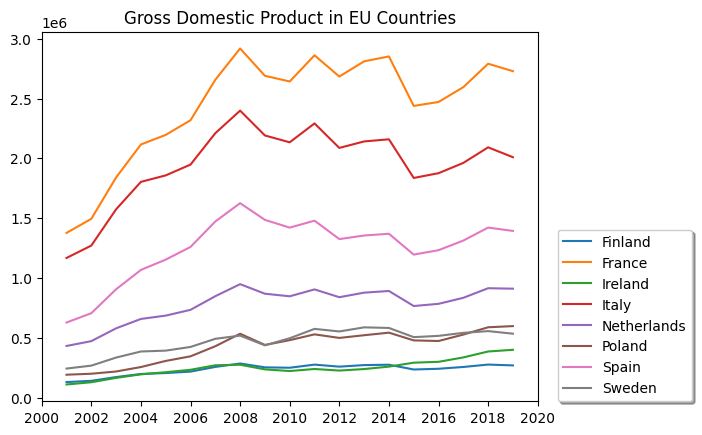

In [6]:
for i in countries:
    plt.plot(gdpDF[gdpDF['Area'] == i]['Year'], gdpDF[gdpDF['Area'] == i]['Value'])
plt.title('Gross Domestic Product in EU Countries')
plt.legend(countries, shadow=True, loc=(1.04,0))
plt.xticks(np.arange(2000, 2022, 2))
plt.show()

In [7]:
df_merged = pd.merge(df,gdpDF[['Year','Value','Area']], on=['Year','Area'])

In [8]:
df_merged = df_merged.rename(columns = {'Value_x':'Expenditure','Value_y':'GDP'})

In [9]:
df_merged['Expenditure_%GDP'] = [((df_merged['Expenditure'][i]/df_merged['GDP'][i])*100) for i in range(len(df))]
df_merged = df_merged.sort_values(by='Expenditure_%GDP',ascending=False)
df_merged
print(df_merged.Year.unique())

[2008 2003 2002 2001 2005 2006 2004 2009 2007 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019]


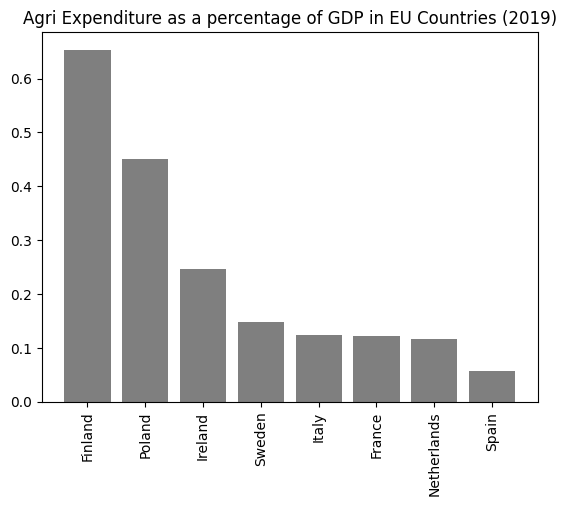

In [10]:
for i in countries:
    plt.bar(df_merged[df_merged['Year'] == 2019]['Area'],df_merged[df_merged['Year'] == 2019]['Expenditure_%GDP'])
plt.title('Agri Expenditure as a percentage of GDP in EU Countries (2019)')

plt.xticks(rotation='vertical')

plt.show()

In [11]:
yieldd = pd.read_csv('cropProduction.csv')
yieldd = yieldd[(yieldd['Item'].isin(['Barley','Wheat','Potatoes'])) & (yieldd['Element'] == 'Yield')]

In [12]:
df_merged_yieldd = pd.merge(df_merged,yieldd[['Area','Value','Year','Item']],on=['Area','Year'])
df_merged_yieldd

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item_x,Year Code,Year,Unit,Expenditure,Flag,Flag Description,Note,GDP,Expenditure_%GDP,Value,Item_y
0,IG,Government Expenditure,372,Ireland,6110,Value US$,23161,"Agriculture, forestry, fishing (Central Govern...",2008,2008,millions,3246.729320,A,Official figure,Consolidated Central Government Expenditure In...,2.743371e+05,1.183482,69129.0,Barley
1,IG,Government Expenditure,372,Ireland,6110,Value US$,23161,"Agriculture, forestry, fishing (Central Govern...",2008,2008,millions,3246.729320,A,Official figure,Consolidated Central Government Expenditure In...,2.743371e+05,1.183482,307946.0,Potatoes
2,IG,Government Expenditure,372,Ireland,6110,Value US$,23161,"Agriculture, forestry, fishing (Central Govern...",2008,2008,millions,3246.729320,A,Official figure,Consolidated Central Government Expenditure In...,2.743371e+05,1.183482,89684.0,Wheat
3,IG,Government Expenditure,246,Finland,6110,Value US$,23161,"Agriculture, forestry, fishing (Central Govern...",2003,2003,millions,1865.616543,A,Official figure,Consolidated Central Government Expenditure Ex...,1.712677e+05,1.089299,32057.0,Barley
4,IG,Government Expenditure,246,Finland,6110,Value US$,23161,"Agriculture, forestry, fishing (Central Govern...",2003,2003,millions,1865.616543,A,Official figure,Consolidated Central Government Expenditure Ex...,1.712677e+05,1.089299,215122.0,Potatoes
5,IG,Government Expenditure,246,Finland,6110,Value US$,23161,"Agriculture, forestry, fishing (Central Govern...",2003,2003,millions,1865.616543,A,Official figure,Consolidated Central Government Expenditure Ex...,1.712677e+05,1.089299,35494.0,Wheat
6,IG,Government Expenditure,246,Finland,6110,Value US$,23161,"Agriculture, forestry, fishing (Central Govern...",2002,2002,millions,1520.867220,A,Official figure,Consolidated Central Government Expenditure Ex...,1.397447e+05,1.088318,33270.0,Barley
7,IG,Government Expenditure,246,Finland,6110,Value US$,23161,"Agriculture, forestry, fishing (Central Govern...",2002,2002,millions,1520.867220,A,Official figure,Consolidated Central Government Expenditure Ex...,1.397447e+05,1.088318,261779.0,Potatoes
8,IG,Government Expenditure,246,Finland,6110,Value US$,23161,"Agriculture, forestry, fishing (Central Govern...",2002,2002,millions,1520.867220,A,Official figure,Consolidated Central Government Expenditure Ex...,1.397447e+05,1.088318,32585.0,Wheat
9,IG,Government Expenditure,246,Finland,6110,Value US$,23161,"Agriculture, forestry, fishing (Central Govern...",2001,2001,millions,1398.645202,A,Official figure,Consolidated Central Government Expenditure Ex...,1.294199e+05,1.080704,32639.0,Barley


## ANOVA

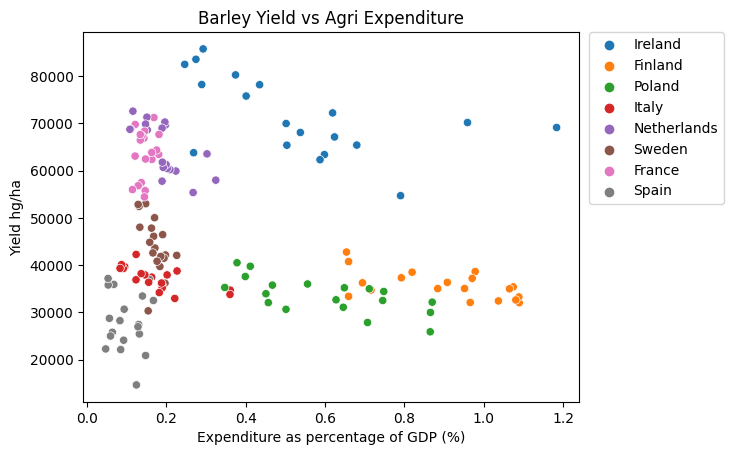

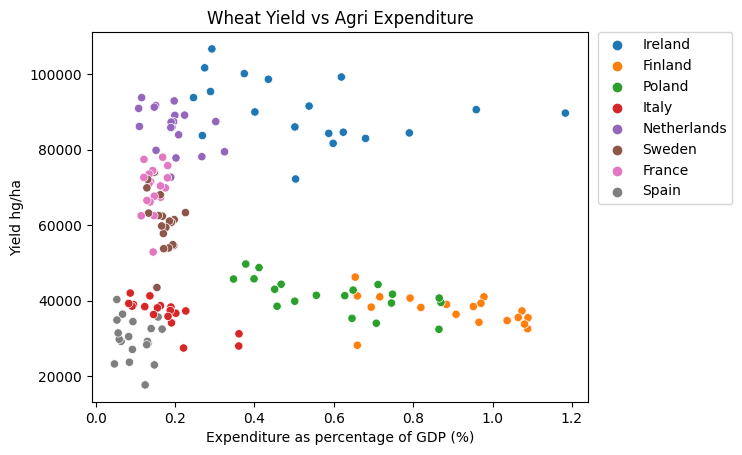

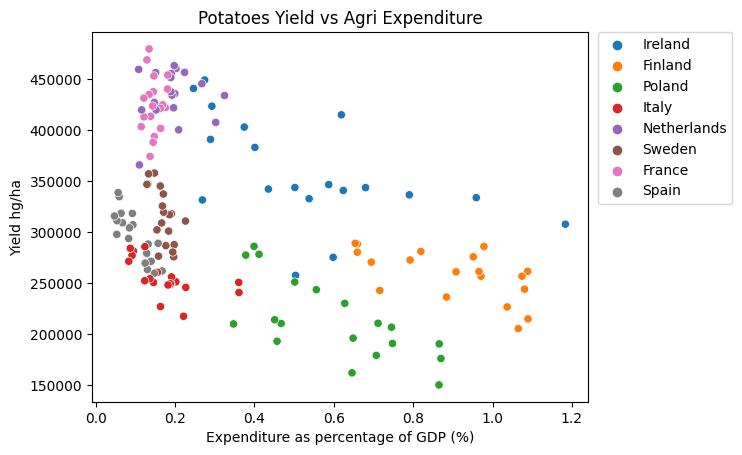

In [13]:
import seaborn as sns
    
for i in ['Barley','Wheat','Potatoes']:
    sns.scatterplot(data=df_merged_yieldd[df_merged_yieldd['Item_y'] == i], x='Expenditure_%GDP', y="Value", hue="Area")
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.title(i+' Yield vs Agri Expenditure')
    plt.xlabel('Expenditure as percentage of GDP (%)')
    plt.ylabel('Yield hg/ha')
    plt.show()

In [14]:
import scipy as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import scipy as scipy

for i in df_merged_yieldd['Area'].unique():
    print(i+':')
    print(stats.shapiro(df_merged_yieldd[(df_merged_yieldd['Item_y'] == 'Barley') & (df_merged_yieldd['Area'] == i)]['Value']))

Ireland:
ShapiroResult(statistic=0.9656050205230713, pvalue=0.6864045262336731)
Finland:
ShapiroResult(statistic=0.9346929788589478, pvalue=0.21120667457580566)
Poland:
ShapiroResult(statistic=0.9834518432617188, pvalue=0.9747251272201538)
Italy:
ShapiroResult(statistic=0.983810305595398, pvalue=0.9772108793258667)
Netherlands:
ShapiroResult(statistic=0.898930013179779, pvalue=0.046532534062862396)
Sweden:
ShapiroResult(statistic=0.9539345502853394, pvalue=0.45971593260765076)
France:
ShapiroResult(statistic=0.9238187074661255, pvalue=0.13315372169017792)
Spain:
ShapiroResult(statistic=0.9607469439506531, pvalue=0.5871829390525818)


Netherlands has been determined to be non-normal. Will be excluded from ANOVA analysis.

In [15]:
df_merged_yieldd = df_merged_yieldd[df_merged_yieldd.Area != 'Netherlands']

In [16]:
ireland = df_merged_yieldd.Value[df_merged_yieldd.Area == 'Ireland']
finland = df_merged_yieldd.Value[df_merged_yieldd.Area == 'Finland']
poland = df_merged_yieldd.Value[df_merged_yieldd.Area == 'Poland']
italy = df_merged_yieldd.Value[df_merged_yieldd.Area == 'Italy']
sweden = df_merged_yieldd.Value[df_merged_yieldd.Area == 'Sweden']
france = df_merged_yieldd.Value[df_merged_yieldd.Area == 'France']
spain = df_merged_yieldd.Value[df_merged_yieldd.Area == 'Spain']


In [17]:

from scipy.stats import levene
levene(ireland,finland,poland,italy,sweden,france,spain, center = 'mean')

LeveneResult(statistic=18.17515063366728, pvalue=1.2264987302047994e-18)

In [18]:
#ONE-WAY ANOVA
model = ols('Value~Area', data = df_merged_yieldd).fit()
aov = sm.stats.anova_lm(model, type=2)
print(aov)

             df        sum_sq       mean_sq         F    PR(>F)
Area        6.0  4.053147e+11  6.755246e+10  4.299922  0.000325
Residual  392.0  6.158383e+12  1.571016e+10       NaN       NaN


In [19]:
#ONE-WAY WELCH ANOVA
import pingouin as pg
pg.welch_anova(dv='Value', between='Area', data=df_merged_yieldd)

,Source,ddof1,ddof2,F,p-unc,np2
0,Area,6,173.455879,3.898025,0.001119,0.061751
